# Data Projekt 2 Team_xmisti00


## Load and Show data set 


In [394]:
# Path: main.ipynb

''' for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

#data cleansing


In [395]:
df = pd.read_csv('./data/IT Salary Survey EU  2020.csv')
df

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,72000,70000.0,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,60000.0,3000,48000.0,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,0,90000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350.0,40950,33800.0,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0


## Data Exploration

### prozkoumejte jednotlivé atributy datové sady, jejich typ a hodnoty, kterých nabývají (počet hodnot, nejčastější hodnoty, rozsah hodnot atd.)

In [396]:
# find range of all columns for dataframe

df.describe()





,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


In [397]:
# count values in all columns

for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print('--------------------------------------')

# drop columns with too many unique values



Timestamp
24/11/2020 13:55:19    2
25/11/2020 08:47:37    2
24/11/2020 15:07:35    2
25/11/2020 18:28:01    2
24/11/2020 14:07:23    2
                      ..
24/11/2020 20:26:58    1
24/11/2020 20:26:20    1
24/11/2020 20:26:19    1
24/11/2020 20:25:32    1
19/01/2021 12:01:11    1
Name: Timestamp, Length: 1248, dtype: int64
--------------------------------------
Age
30.0    110
33.0     94
32.0     94
28.0     87
31.0     87
29.0     86
35.0     82
34.0     74
36.0     60
26.0     59
27.0     58
38.0     48
37.0     44
25.0     42
40.0     31
24.0     28
39.0     28
42.0     20
41.0     14
23.0     12
45.0     11
43.0     10
22.0      8
44.0      8
46.0      8
48.0      4
47.0      3
56.0      2
49.0      2
54.0      2
66.0      1
53.0      1
65.0      1
59.0      1
50.0      1
51.0      1
21.0      1
20.0      1
69.0      1
52.0      1
Name: Age, dtype: int64
--------------------------------------
Gender
Male       1049
Female      192
Diverse       2
Name: Gender, dtype: int64
---

In [398]:
#Size of row x columns
df.shape

(1253, 23)

In [399]:
df.mode(numeric_only=True)

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
0,30.0,60000.0,65000.0,0.0


In [400]:
# experimental for dypes of columns

''' colList = list[df.columns]
print(colList)

for col in range (len(df.columns)):
    print( df[df.columns[col]].dtypes)  '''

print(df.dtypes)    
    
    
    

Timestamp                                                                                                                   object
Age                                                                                                                        float64
Gender                                                                                                                      object
City                                                                                                                        object
Position                                                                                                                    object
Total years of experience                                                                                                   object
Years of experience in Germany                                                                                              object
Seniority level                                                                    

In [401]:
#find max value with pandas

print(df["Yearly brutto salary (without bonus and stocks) in EUR"].nlargest(1))

# Using DataFrame.loc[] property.
''' df.loc[df['Salary two years ago'].idxmax()]
df.loc[df['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'].idxmax()]
df.loc[df['Age'].idxmax()] '''

473    1.000000e+11
Name: Yearly brutto salary (without bonus and stocks) in EUR, dtype: float64


" df.loc[df['Salary two years ago'].idxmax()]\ndf.loc[df['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'].idxmax()]\ndf.loc[df['Age'].idxmax()] "

In [402]:
#df["Annual bonus+stocks one year ago. Only answer if staying in same country"].max()

''' It is really hard to discuss what is the best yearly bonus, stocks.. '''

df['Age'].nlargest(n=1253)

1103    69.0
59      66.0
296     65.0
23      59.0
232     56.0
        ... 
1063     NaN
1148     NaN
1180     NaN
1181     NaN
1231     NaN
Name: Age, Length: 1253, dtype: float64

## Rozlozeni hodnot

 prozkoumejte rozložení hodnot jednotlivých atributů pomocí vhodných grafů, zaměřte se i na to, jak hodnota jednoho či dvou atributů ovlivní rozložení hodnot jiného atributu. Do dokumentace vložte alespoň 5 různých grafů, zobrazujících zjištěná rozložení hodnot. Použijte různé typy grafů (např. bodový graf, histogram, krabicový nebo houslový graf, graf složený z více podgrafů apod.).

### Age of participants

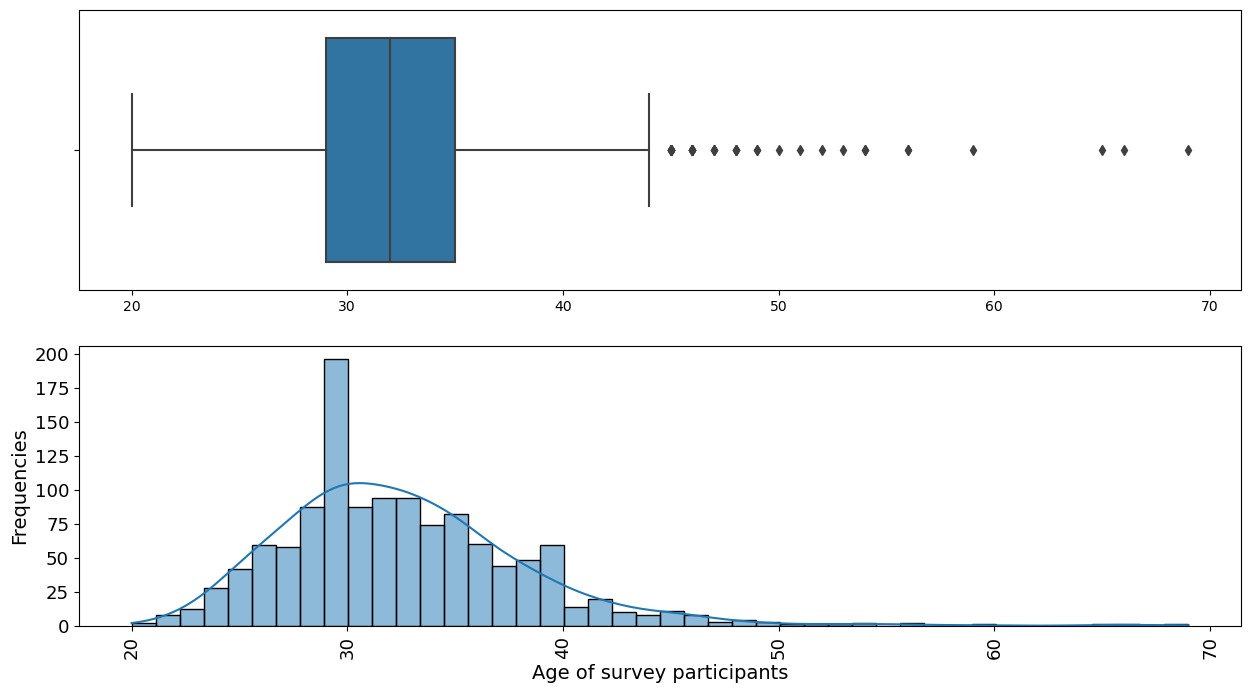

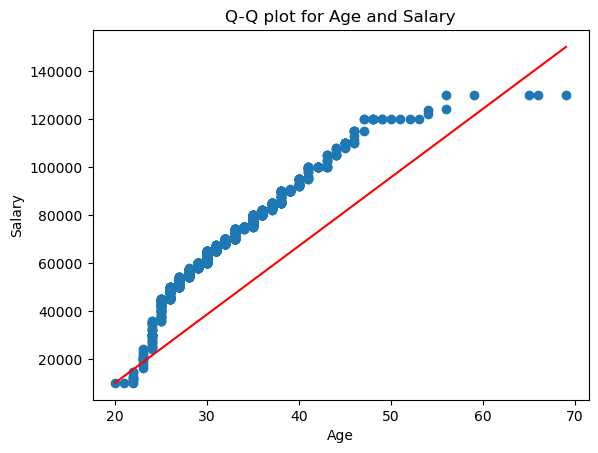

In [403]:
# Age
fig, (ax_box,ax_hist) = plt.subplots(2,figsize=(15,8))

sns.boxplot(data=df,x='Age',ax=ax_box)
ax_box.set(xlabel="")
sns.histplot(data=df,x='Age',kde=True,ax=ax_hist)


plt.xticks(fontsize=13,rotation=90)
plt.xlabel("Age of survey participants",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Frequencies",fontsize=14)
plt.show()
plt.close()
df['Age'].describe()

# create Q-Q plot for age and salary

plt.figure()
plt.scatter(np.sort(df['Age']), np.sort(df['Yearly brutto salary (without bonus and stocks) in EUR']))
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Q-Q plot for Age and Salary')
# add the line y=x
x = np.array([df['Age'].min(), df['Age'].max()])
y = np.array([df['Yearly brutto salary (without bonus and stocks) in EUR'].min(),150000])
plt.plot(x, y, color='red')
plt.show()
plt.close()


### Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country of Participants

In [404]:
''' # Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country of survey participants distribution - single attributt text
fig, (ax_box,ax_hist) = plt.subplots(2,figsize=(16,10))

sns.boxplot(data=df,x='Yearly brutto salary (without bonus and stocks) in EUR',ax=ax_box)
ax_box.set(xlabel="")
sns.histplot(data=df,x='Age',ax=ax_hist)


plt.xticks(fontsize=13,rotation=90)
plt.xlabel("Yearly brutto salary (without bonus and stocks) in EUR",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Frequencies",fontsize=14)
plt.show() '''
df['Yearly brutto salary (without bonus and stocks) in EUR'].describe() # output for number data

count    1.253000e+03
mean     8.027904e+07
std      2.825061e+09
min      1.000100e+04
25%      5.880000e+04
50%      7.000000e+04
75%      8.000000e+04
max      1.000000e+11
Name: Yearly brutto salary (without bonus and stocks) in EUR, dtype: float64

In [405]:
# create 5 graphs for salary distribution

# normalize salary data for better visualization



''' fig, (ax_box,ax_hist) = plt.subplots(2,figsize=(16,10))

sns.boxplot(data=df,x='Yearly brutto salary (without bonus and stocks) in EUR',ax=ax_box)

ax_box.set(xlabel="")
sns.histplot(data=df,x='Yearly brutto salary (without bonus and stocks) in EUR',kde=True,ax=ax_hist) '''





' fig, (ax_box,ax_hist) = plt.subplots(2,figsize=(16,10))\n\nsns.boxplot(data=df,x=\'Yearly brutto salary (without bonus and stocks) in EUR\',ax=ax_box)\n\nax_box.set(xlabel="")\nsns.histplot(data=df,x=\'Yearly brutto salary (without bonus and stocks) in EUR\',kde=True,ax=ax_hist) '

## proveďte podrobnou analýzu chybějící hodnot (celkový počet chybějících hodnot, počet objektů s více chybějícími hodnotami atd.).

In [406]:
# Checking for NaN value in columns
df.isna().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

In [407]:
df.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

In [408]:
df.isin({'Age' : [21]})

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1249,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1250,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1251,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Pocet objektu s vice chybejicimi hodnotami

In [409]:
counter = 0
for i in range(len(df.index)) :
    if df.iloc[i].isnull().sum() > 1 :
        counter += 1
print("Total rows with NaN values: ", counter)          

Total rows with NaN values:  954


In [410]:
#pocet vsech NaN hodnot

df.isnull().sum().sum()


3682